<a href="https://colab.research.google.com/github/MarcoSuarezECCI/SeminarioBigData/blob/main/AI_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de casos de dengue Atlantico

## Librerias

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive

##------------- Librerias Machine Learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

## Obtención de la información

In [28]:
drive.mount('/content/drive')

file = '/content/drive/MyDrive/data/Articulo/Procesados/Datos_Dengue_Procesado.xlsx'

data = pd.read_excel(file)
print(data.shape)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(29396, 15)


,consecutivo,fechaNotificacion,semana,anio,edad,sexo,estrato,fechaNacimiento,estadoCaso,nombreUnidad,pais,evento,departamento,municipio,grupoEtario
0,8563847,2021-09-21,37,2021,5,F,2,2015-10-27,Confirmado por laboratorio,MIRED BARRANQUILLA SEDE CAMINO MURILLO,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,primeraInfancia
1,8563848,2021-11-23,46,2021,5,F,3,2015-12-03,Confirmado por laboratorio,SANITAS URGENCIAS BAJA COMPLEJIDAD,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,primeraInfancia
2,8563820,2022-01-02,52,2021,19,M,2,2002-07-08,Confirmado por laboratorio,MIRED BARRANQUILLA SEDE CAMINO MURILLO,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,juventud
3,8563822,2021-09-23,37,2021,19,M,2,2002-04-12,Confirmado por laboratorio,ESE HOSPITAL DE MALAMBO,COLOMBIA,DENGUE,ATLANTICO,MALAMBO,juventud
4,8563823,2021-10-22,37,2021,19,M,3,2002-05-25,Confirmado por laboratorio,CLINICA DEL CARMEN,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,juventud


## Verificar el tipo de datos

In [29]:
data.dtypes

consecutivo           int64
fechaNotificacion    object
semana                int64
anio                  int64
edad                  int64
sexo                 object
estrato              object
fechaNacimiento      object
estadoCaso           object
nombreUnidad         object
pais                 object
evento               object
departamento         object
municipio            object
grupoEtario          object
dtype: object

Establecer las columnas de valor

In [30]:
datacc = data
datacc = datacc.drop([
    #'consecutivo',
    'fechaNotificacion','edad','sexo','estrato','fechaNacimiento','estadoCaso','nombreUnidad','pais','evento','departamento','municipio'
    ], axis=1)
datacc.shape
datacc.head()

,consecutivo,semana,anio,grupoEtario
0,8563847,37,2021,primeraInfancia
1,8563848,46,2021,primeraInfancia
2,8563820,52,2021,juventud
3,8563822,37,2021,juventud
4,8563823,37,2021,juventud


## Histogramas

Text(0.5, 1.0, '$grupo Etario$')

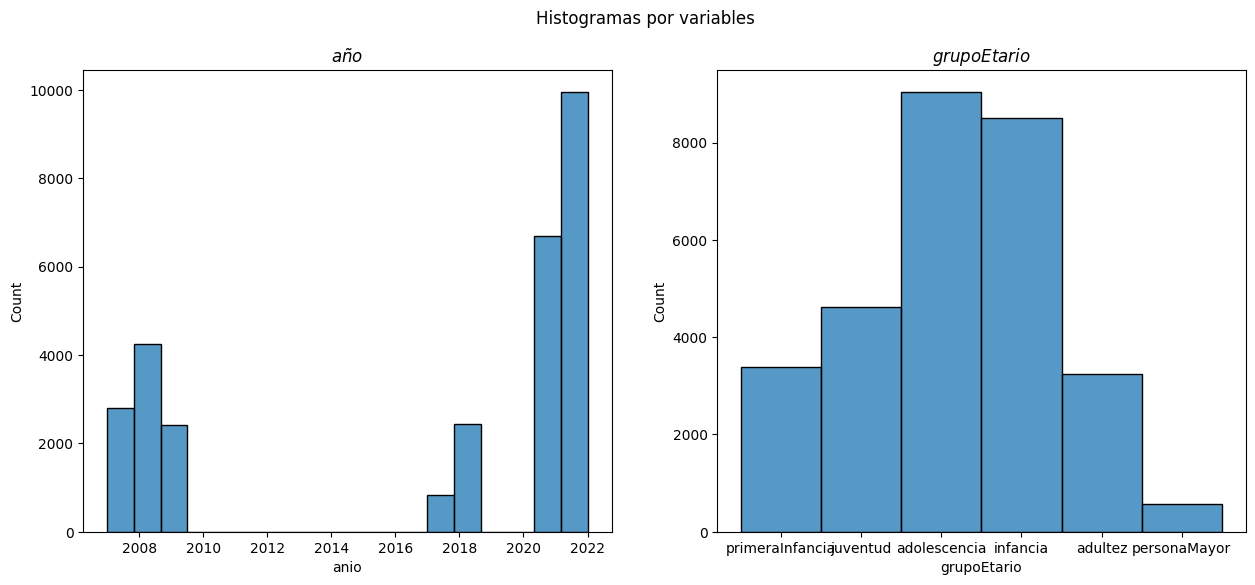

In [31]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Histogramas por variables')
sns.histplot(datacc['anio'], ax=ax1)
ax1.set_title('$año$')
sns.histplot(datacc['grupoEtario'], ax=ax2)
ax2.set_title('$grupo Etario$')
#sns.histplot(datacc['anio','semana'], ax=ax3)
#ax3.set_title('$semana$')

## Categorización

In [32]:
datacc['grupoEtario'] = datacc['grupoEtario'].astype('category')
datacc.dtypes
datacc['grupoEtario']  = pd.Categorical(datacc['grupoEtario']).codes
datacc.head()

,consecutivo,semana,anio,grupoEtario
0,8563847,37,2021,5
1,8563848,46,2021,5
2,8563820,52,2021,3
3,8563822,37,2021,3
4,8563823,37,2021,3


Text(0.5, 1.0, '$Grupo Etario$')

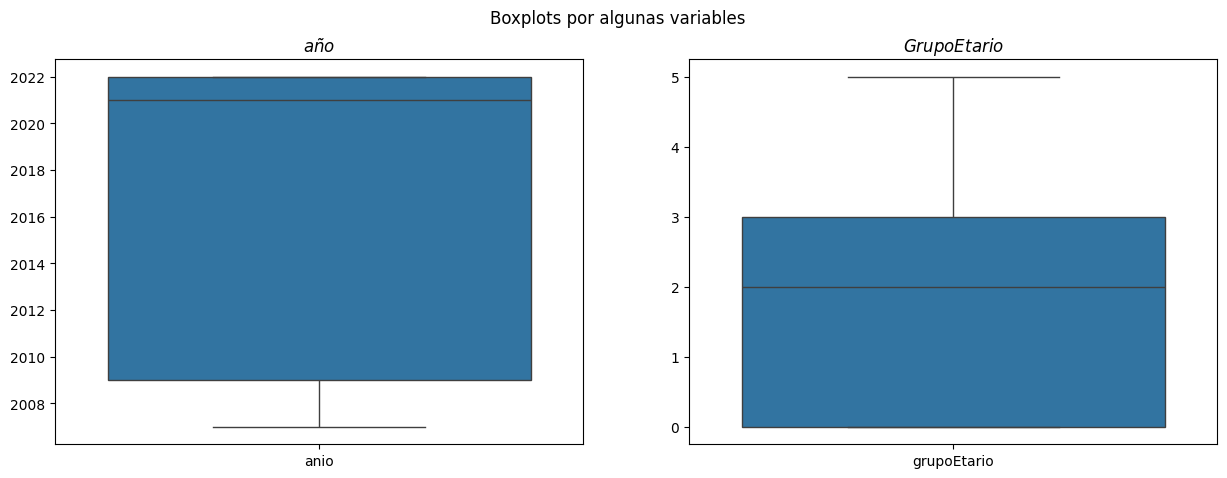

In [33]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Boxplots por algunas variables')
sns.boxplot(data=datacc[['anio']], ax=ax1)
sns.boxplot(data=datacc[['grupoEtario']], ax=ax2)
ax1.set_title('$año$')
ax2.set_title('$Grupo Etario$')
#sns.boxplot(data=datacc[['kms']], ax=ax3)